# Remapping degenerated network

When modelling wild type and degenerated networks, we want to be able to both remove and add synapses due to changes in dendritic and axonal morphologies. The synapses that are on unchanged branches should remain the same, removed branches will have their synapses removed, while added branches will get new synapses.

Preparation. 
Create a wild type network using Snudda.
Recreate the same network but with the modified morphologies (e.g. Parkinson's disease degenerated SPN dendrites, and growing FS axons).

Run this notebook on the two created networks.

In [1]:
original_network = "/home/hjorth/HBP/DELME/networks/pd0_1k_swap"
updated_network = "/home/hjorth/HBP/DELME/networks/pd2_1k_swap"
output_network =  "/home/hjorth/HBP/DELME/networks/pd2_output_network"

import os

original_network_file = os.path.join(original_network, "network-synapses.hdf5")
updated_network_file = os.path.join(updated_network, "network-synapses.hdf5")
output_network_file =  os.path.join(output_network, "network-synapses.hdf5")

original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0"
updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2"

# original_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD0"
# updated_snudda_data_dir = "/home/hjorth/HBP/BasalGangliaData/Parkinson/20211105/PD2"

In [ ]:
from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=original_network_file,
                                             updated_network_file=updated_network_file,
                                             output_network_file=output_network_file,
                                             original_snudda_data_dir=original_snudda_data_dir,
                                             updated_snudda_data_dir=updated_snudda_data_dir)

In [ ]:
import cProfile
prof_file = "whysoslow.profile"
cProfile.runctx("swap.write_new_network_file()", None, locals(), filename=prof_file)
# swap.write_new_network_file()
swap.close()

In [ ]:
import pstats
from pstats import SortKey
p = pstats.Stats(prof_file)
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats(100)

In [ ]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=original_network,
                      degenerated_network_path=output_network)
plot_neuron_id = 1
pd.plot_neuron(neuron_id=plot_neuron_id)

In [6]:
check_type="Pre"
check_id = 500
cmd_str1 = f"snudda_load {original_network}/network-synapses.hdf5 --list{check_type} {check_id}"
cmd_str2 = f"snudda_load {updated_network}/network-synapses.hdf5 --list{check_type} {check_id}"
cmd_str3 = f"snudda_load {output_network}/network-synapses.hdf5 --list{check_type} {check_id}"

os.system(cmd_str1)
os.system(cmd_str2)
os.system(cmd_str3)

Loading 999 neurons with 275073 synapses and 32 gap junctions
List neurons pre-synaptic to neuronID = 500 (iSPN_33)
The neuron receives 224 synapses
38 : iSPN_24 (3 synapses)
50 : iSPN_31 (2 synapses)
92 : iSPN_20 (2 synapses)
111 : iSPN_28 (2 synapses)
112 : iSPN_32 (3 synapses)
165 : iSPN_24 (4 synapses)
170 : iSPN_12 (3 synapses)
171 : iSPN_15 (3 synapses)
172 : iSPN_25 (3 synapses)
213 : iSPN_8 (4 synapses)
228 : iSPN_33 (2 synapses)
254 : iSPN_23 (3 synapses)
262 : dSPN_22 (2 synapses)
279 : iSPN_2 (6 synapses)
281 : iSPN_4 (2 synapses)
283 : iSPN_19 (3 synapses)
287 : iSPN_25 (3 synapses)
299 : iSPN_2 (3 synapses)
312 : iSPN_8 (4 synapses)
313 : iSPN_26 (3 synapses)
327 : iSPN_26 (2 synapses)
343 : iSPN_27 (2 synapses)
378 : iSPN_18 (3 synapses)
382 : iSPN_13 (2 synapses)
383 : iSPN_33 (3 synapses)
390 : iSPN_19 (3 synapses)
394 : iSPN_2 (3 synapses)
404 : iSPN_12 (3 synapses)
405 : FS_2 (2 synapses)
407 : dSPN_12 (2 synapses)
411 : iSPN_13 (3 synapses)
418 : iSPN_16 (4 synapses)

Loading 999 neurons with 275073 synapses and 32 gap junctions
Loading 999 neurons with 99702 synapses and 30 gap junctions
> /home/hjorth/HBP/Snudda/snudda/plotting/plot_degeneration_and_growth.py(92)categorising_synapses()
     90         pdb.set_trace()
     91 
---> 92         removed_synapse_coords = removed_synapses[:, 2:5] * self.original_file.data["voxelSize"] + self.original_file.data["simulationOrigo"]
     93         kept_synapse_coords_A = kept_synapses_A[:, 2:5] * self.original_file.data["voxelSize"] + self.original_file.data["simulationOrigo"]
     94         kept_synapse_coords_B = kept_synapses_B[:, 2:5] * self.degenerated_file.data["voxelSize"] + self.degenerated_file.data["simulationOrigo"]



ipdb>  added_synapses


array([[     9,      2,    175,    148,    153,     50,     17,    352,
           135,     25,    611,    499, 972803],
       [     9,      2,    180,    171,    168,     50,     17,    237,
           166,     15,    966,    310, 972803],
       [     9,      2,    150,    204,    168,     57,     17,    186,
           136,     43,    423,    209, 972803],
       [     9,      2,    180,    189,    170,     57,     17,    133,
           114,     35,    406,    435, 972803],
       [    24,      2,    174,    180,    162,     50,     11,    283,
            41,      2,     84,    297, 875030],
       [    24,      2,    168,    167,    184,     51,     11,    181,
            62,     64,    159,    110, 875030],
       [    24,      2,    178,    189,    165,     57,     11,    387,
            60,     56,    927,    414, 875030],
       [    24,      2,    184,    167,    175,     92,     11,    262,
            81,     58,    451,    752, 875030],
       [    24,      2,    192, 

ipdb>  added_synapses.shape


(46, 13)


ipdb>  c


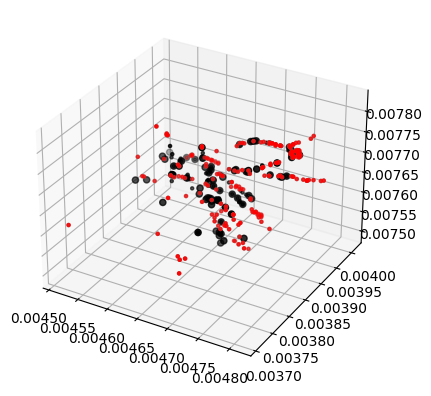

In [2]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=original_network, degenerated_network_path=output_network, neuron_id=2)
pdg.plot_synapses()

In [ ]:
cmd_str1 = f"snudda_load {original_network}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {updated_network}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {output_network}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)